Diskon yang diberikan: 25.00%


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


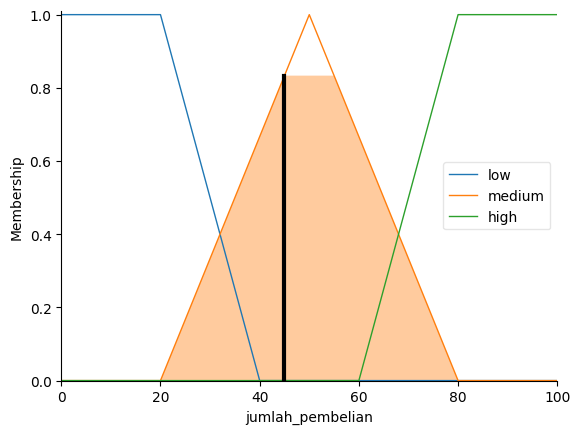

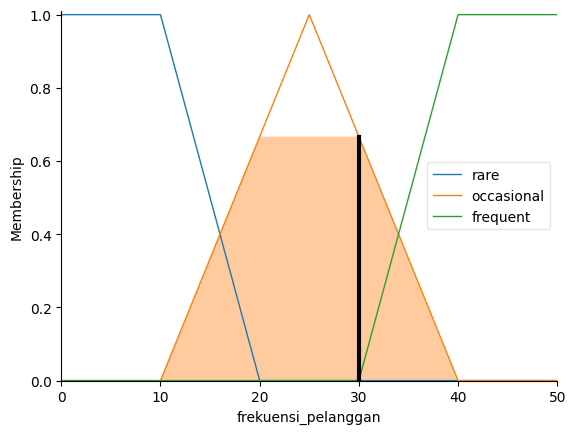

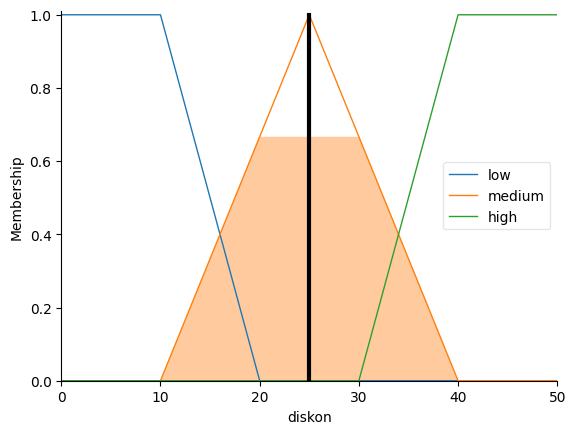

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Definisi variabel fuzzy
# Input: Jumlah Pembelian (dalam ribuan rupiah)
jumlah_pembelian = ctrl.Antecedent(np.arange(0, 101, 1), 'jumlah_pembelian')
# Input: Frekuensi Pelanggan (jumlah kunjungan)
frekuensi_pelanggan = ctrl.Antecedent(np.arange(0, 51, 1), 'frekuensi_pelanggan')
# Output: Diskon (persentase)
diskon = ctrl.Consequent(np.arange(0, 51, 1), 'diskon')

# 2. Definisi himpunan fuzzy
# Jumlah pembelian
jumlah_pembelian['low'] = fuzz.trapmf(jumlah_pembelian.universe, [0, 0, 20, 40])
jumlah_pembelian['medium'] = fuzz.trimf(jumlah_pembelian.universe, [20, 50, 80])
jumlah_pembelian['high'] = fuzz.trapmf(jumlah_pembelian.universe, [60, 80, 100, 100])

# Frekuensi pelanggan
frekuensi_pelanggan['rare'] = fuzz.trapmf(frekuensi_pelanggan.universe, [0, 0, 10, 20])
frekuensi_pelanggan['occasional'] = fuzz.trimf(frekuensi_pelanggan.universe, [10, 25, 40])
frekuensi_pelanggan['frequent'] = fuzz.trapmf(frekuensi_pelanggan.universe, [30, 40, 50, 50])

# Diskon
diskon['low'] = fuzz.trapmf(diskon.universe, [0, 0, 10, 20])
diskon['medium'] = fuzz.trimf(diskon.universe, [10, 25, 40])
diskon['high'] = fuzz.trapmf(diskon.universe, [30, 40, 50, 50])

# 3. Definisi aturan fuzzy
rule1 = ctrl.Rule(jumlah_pembelian['low'] & frekuensi_pelanggan['rare'], diskon['low'])
rule2 = ctrl.Rule(jumlah_pembelian['low'] & frekuensi_pelanggan['occasional'], diskon['low'])
rule3 = ctrl.Rule(jumlah_pembelian['low'] & frekuensi_pelanggan['frequent'], diskon['medium'])

rule4 = ctrl.Rule(jumlah_pembelian['medium'] & frekuensi_pelanggan['rare'], diskon['low'])
rule5 = ctrl.Rule(jumlah_pembelian['medium'] & frekuensi_pelanggan['occasional'], diskon['medium'])
rule6 = ctrl.Rule(jumlah_pembelian['medium'] & frekuensi_pelanggan['frequent'], diskon['high'])

rule7 = ctrl.Rule(jumlah_pembelian['high'] & frekuensi_pelanggan['rare'], diskon['medium'])
rule8 = ctrl.Rule(jumlah_pembelian['high'] & frekuensi_pelanggan['occasional'], diskon['high'])
rule9 = ctrl.Rule(jumlah_pembelian['high'] & frekuensi_pelanggan['frequent'], diskon['high'])

# 4. Membuat kontrol sistem
diskon_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
diskon_sim = ctrl.ControlSystemSimulation(diskon_ctrl)

# 5. Input nilai dan simulasi
# Contoh input
diskon_sim.input['jumlah_pembelian'] = 45  # 45 ribu
diskon_sim.input['frekuensi_pelanggan'] = 30  # 30 kali kunjungan

# Proses simulasi
diskon_sim.compute()

# Output hasil
print(f"Diskon yang diberikan: {diskon_sim.output['diskon']:.2f}%")

# 6. Visualisasi
jumlah_pembelian.view(sim=diskon_sim)
frekuensi_pelanggan.view(sim=diskon_sim)
diskon.view(sim=diskon_sim)
